In [34]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Reshape
import matplotlib.pyplot as plt

In [35]:
inputs = []
targets = []

In [36]:
for i in range(50):
    with open('dataset.json', 'r') as fp:
        data = json.load(fp)
        inputs = inputs + data['roi']
        targets = targets + data['peak']

In [37]:
inputs = np.array(inputs)
targets = np.array(targets)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]

In [39]:
X_train.shape
input_shape=X_train[0].shape
input_shape

(20, 1)

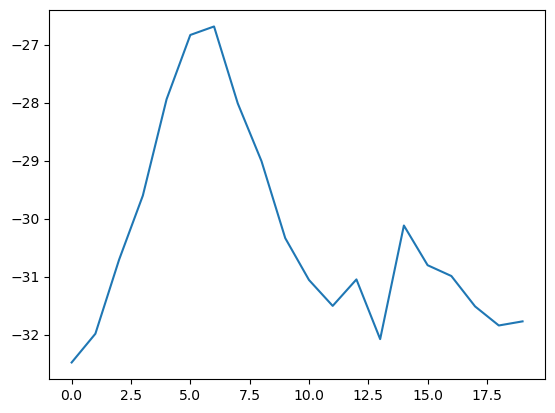

In [40]:
plt.plot(X_train[50])

In [41]:
model = Sequential()

model.add(Conv1D(filters=20, kernel_size=3, activation='relu', input_shape=input_shape))

model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))

model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 18, 20)            80        
                                                                 
 conv1d_10 (Conv1D)          (None, 16, 16)            976       
                                                                 
 conv1d_11 (Conv1D)          (None, 14, 8)             392       
                                                                 
 flatten_3 (Flatten)         (None, 112)               0         
                                                                 
 dense_12 (Dense)            (None, 16)                1808      
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 4)                

In [44]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100)

Epoch 1/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.3235 - binary_accuracy: 0.8320 - val_loss: 0.1851 - val_binary_accuracy: 0.9343
Epoch 2/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.1742 - binary_accuracy: 0.9345 - val_loss: 0.1586 - val_binary_accuracy: 0.9378
Epoch 3/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.1608 - binary_accuracy: 0.9363 - val_loss: 0.1504 - val_binary_accuracy: 0.9408
Epoch 4/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.1545 - binary_accuracy: 0.9397 - val_loss: 0.1602 - val_binary_accuracy: 0.9453
Epoch 5/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.1503 - binary_accuracy: 0.9405 - val_loss: 0.1441 - val_binary_accuracy: 0.9416
Epoch 6/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.1467 - binary_accuracy: 0.9417 - val_loss: 0.1442 - val_binary_accuracy: 0.9453
Epoch 7/100
1435/1435 [=======================

1435/1435 [==============================] - 2s 1ms/step - loss: 0.0754 - binary_accuracy: 0.9730 - val_loss: 0.0690 - val_binary_accuracy: 0.9771
Epoch 53/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0747 - binary_accuracy: 0.9723 - val_loss: 0.0802 - val_binary_accuracy: 0.9655
Epoch 54/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0737 - binary_accuracy: 0.9739 - val_loss: 0.0743 - val_binary_accuracy: 0.9743
Epoch 55/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0719 - binary_accuracy: 0.9751 - val_loss: 0.0715 - val_binary_accuracy: 0.9731
Epoch 56/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0720 - binary_accuracy: 0.9742 - val_loss: 0.0689 - val_binary_accuracy: 0.9714
Epoch 57/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0711 - binary_accuracy: 0.9741 - val_loss: 0.0685 - val_binary_accuracy: 0.9741
Epoch 58/100
1435/1435 [=============================

In [45]:
prediction = model.predict(X_test, verbose=0)

[0.00370151]


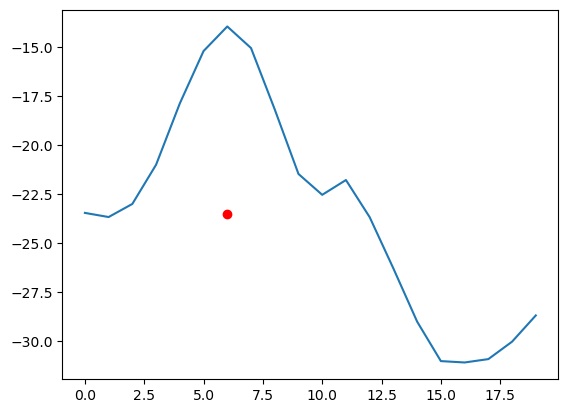

In [46]:
plt.plot(X_test[78])
plt.scatter(np.argmax(X_test[78]), max(X_test[76]), c='r')
print(prediction[76])

[7.744245e-10]


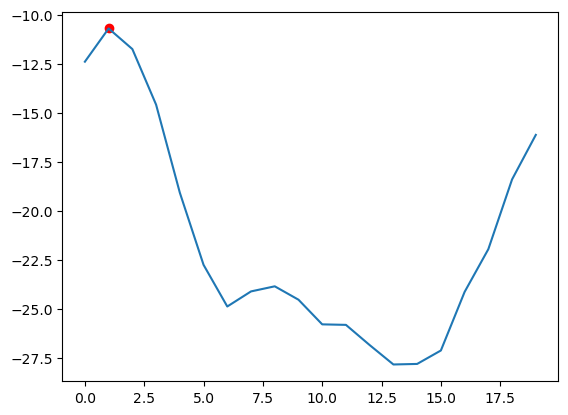

In [47]:
plt.plot(X_test[62])
plt.scatter(np.argmax(X_test[62]), max(X_test[62]), c='r')
print(prediction[62])

In [49]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
